# Hyperparameters Tuning


{{ badge }}

The problem of selecting a group of ideal hyperparameters for a learning algorithm is known as hyperparameter tuning. A parameter that value is utilized to influence the learning process is known as a hyperparameter. The values of additional parameters, such as node weights, are often learnt.

To generalize various data patterns, the same machine learning model may need different constraints, weights, or learning rates. Hyperparameters are these variables that need to be adjusted in order for the model to work best while solving a machine learning challenge. An ideal model is produced through hyperparameter optimization, which identifies a tuple of hyperparameters that minimizes a predetermined loss function on provided independent data. This generalization performance is frequently estimated using cross-validation.


# Types of Hyperparameters Turners 

In sklearn there is 2 main hyperparameter tuners:

1. **Grid Search** - It is a popular way to achieve hyperparameter optimization. It works by examining exhaustively through a designated subset of hyperparameters.


2. **Random Search**- Random search varies from grid search primarily in that it searches the specified subset of hyperparameters randomly somewhat of exhaustively. The significant benefit being decreased processing time.



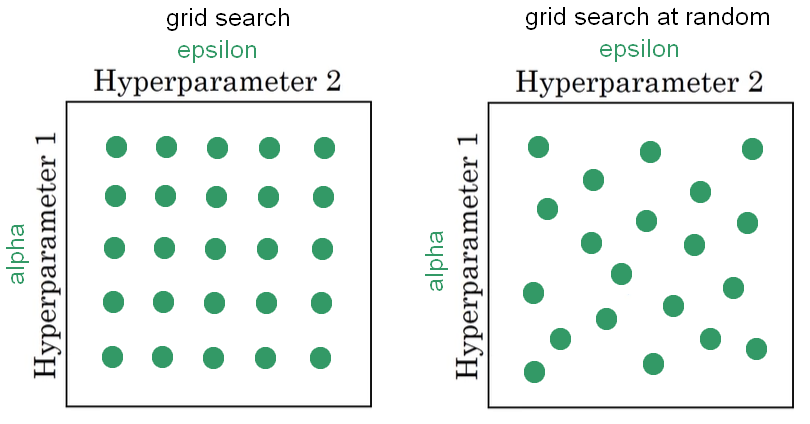

#Grid Search

## Import Libraries and Load Data

In [4]:
from sklearn import svm, metrics, datasets, model_selection
import pandas as pd
import numpy as np 

In [5]:
x, y = datasets.load_iris(return_X_y=True)

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Define and Fit GridSearchCV

1. We define the baseline model.

In [7]:
svc = svm.SVC()

2.  we'll define the possible hyperparamter values for the hyperparameters we intend to tune.

For this exmaple, we will be tuning the `kernel` and `C` parameters, we'll define their possible values inside a dictionary.

The possible hyperparameter values are defined as a dictionary with parameters names (string) as keys and lists of parameter settings to try as values.



In [8]:
params = {'kernel': [ 'poly','linear', 'rbf', 'sigmoid'], 
          'C': np.arange(1,100,5)}

3. By defalue, `GridSearchCV` uses the model's built-in `score` function to measure the model's performance (in `SVC` the default score function is the accuracy). Since we're working with a binary classification problem, we will need other metrics aside from accuracy like precision and recall.

We'll specify the metrics we want to utilize as a dictionary, where the keys are the name of the metrics (string) and the values are the scorer object. We can create a scorer object by wrapping a metrics'scoring function with `metrics.make_scorer()`.


Note: You need to set the average method if you are dealing with multiclass classification.

In [9]:
scoring={

    
    'F1':metrics.make_scorer( metrics.f1_score,average='weighted'),
    'precision_score':metrics.make_scorer( metrics.precision_score,average='weighted'),
    'recall_score':metrics.make_scorer( metrics.recall_score,average='weighted'),


}

4. We can define a custom cross-validation strategy to override `GridSearchCV`s defalut KFold 5-split cross-validation.

In [10]:
kfold = model_selection.StratifiedShuffleSplit(5, random_state=42)

5. Now, we're all set to create the `GridSearchCV` object, we'll pass the custom paramters we created above to the `GridSearchCV` constructor.

Note that we also used `refit`, which specifies which of the passed metrics will be used as the main metric to decide on the best hyperparameters. Also `verbose` is set to 2 so that the model prints the logs during training in order to get feedback since this process can take a few minutes.


Note: if you want to run the hyperparameter tuning for model in parallel use `n_job` equal to `-1`.


In [11]:
gs = model_selection.GridSearchCV(svc, params, cv=kfold, 
                                  scoring=scoring, 
                                  refit="F1",
                                  n_jobs=-1,
                                 
                                )

6. let's fit the gs object on the dataset, note that we didn't do train_test_split since `GridSearchCV` will do cross-validation automatically.

In [12]:
gs.fit(x, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=None,
            train_size=None),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96]),
                         'kernel': ['poly', 'linear', 'rbf', 'sigmoid']},
             refit='F1',
             scoring={'F1': make_scorer(f1_score, average=weighted),
                      'precision_score': make_scorer(precision_score, average=weighted),
                      'recall_score': make_scorer(recall_score, average=weighted)})

## View GridSearchCV Output

We can display the best set of parameters that `Grid Search` found using `best_params_`, and the score that the model achieved using these hyperparameters.

In [13]:
print("Best Hyperparameters:", gs.best_params_)
print("Best Score (F1): ", gs.best_score_)

Best Hyperparameters: {'C': 1, 'kernel': 'linear'}
Best Score (F1):  0.9865319865319865


We can also get the best model it found using `best_estimator_` field.

In [14]:
best_svc = gs.best_estimator_
best_svc

SVC(C=1, kernel='linear')

We can also display the results of all the experiments that `GridSearchCV` did using `cv_results_`, This enables us to "zoom in" on the set of the best-performing hyperparameters and do a more precise grid search.


In [15]:
# We will convert cv_results_ to a DataFrame using pandas for easier viewing.
df = pd.DataFrame(gs.cv_results_)
# sort the dataframe on the mean_test_f1 score
df.sort_values(['mean_test_F1'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_F1,split1_test_F1,split2_test_F1,...,std_test_precision_score,rank_test_precision_score,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score
15,0.006575,0.003035,0.005173,0.003402,16,sigmoid,"{'C': 16, 'kernel': 'sigmoid'}",0.044444,0.047619,0.0,...,0.023345,80,0.066667,0.066667,0.0,0.000000,0.133333,0.053333,0.049889,69
19,0.006850,0.004923,0.005748,0.003641,21,sigmoid,"{'C': 21, 'kernel': 'sigmoid'}",0.044444,0.055556,0.0,...,0.024674,79,0.066667,0.066667,0.0,0.000000,0.133333,0.053333,0.049889,69
23,0.012808,0.013249,0.004677,0.002908,26,sigmoid,"{'C': 26, 'kernel': 'sigmoid'}",0.044444,0.055556,0.0,...,0.026324,69,0.066667,0.066667,0.0,0.000000,0.133333,0.053333,0.049889,69
27,0.008275,0.003577,0.003071,0.000180,31,sigmoid,"{'C': 31, 'kernel': 'sigmoid'}",0.044444,0.055556,0.0,...,0.026324,69,0.066667,0.066667,0.0,0.000000,0.133333,0.053333,0.049889,69
31,0.003916,0.002244,0.003835,0.001482,36,sigmoid,"{'C': 36, 'kernel': 'sigmoid'}",0.044444,0.055556,0.0,...,0.026324,69,0.066667,0.066667,0.0,0.000000,0.133333,0.053333,0.049889,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,0.001441,0.000919,0.002651,0.000095,11,rbf,"{'C': 11, 'kernel': 'rbf'}",0.932660,0.932660,1.0,...,0.027217,4,0.933333,0.933333,1.0,1.000000,1.000000,0.973333,0.032660,4
48,0.003999,0.001704,0.002829,0.000354,61,poly,"{'C': 61, 'kernel': 'poly'}",1.000000,0.932660,1.0,...,0.027217,4,1.000000,0.933333,1.0,0.933333,1.000000,0.973333,0.032660,4
2,0.001436,0.000050,0.002890,0.000077,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.932660,1.000000,1.0,...,0.022222,1,0.933333,1.000000,1.0,1.000000,1.000000,0.986667,0.026667,1
1,0.001075,0.000089,0.002859,0.000122,1,linear,"{'C': 1, 'kernel': 'linear'}",1.000000,0.932660,1.0,...,0.022222,1,1.000000,0.933333,1.0,1.000000,1.000000,0.986667,0.026667,1
